In [13]:
import pandas as pd
data = pd.read_csv("C:/Users/benja/Documents/drug-classification-project/drug200.csv")

# Dataset overview
print(data.head())       # Display first rows
print(data.info())       # Column types and non-null counts
print(data.isnull().sum())  # Check for missing values

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


In [14]:
# Numerical statistics
print(data.describe())

# Count values for categorical variables
categorical_columns = ['Sex', 'BP', 'Cholesterol', 'Drug']
for col in categorical_columns:
    print(f"Value counts for {col}:\n{data[col].value_counts()}\n")


              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000
Value counts for Sex:
Sex
M    104
F     96
Name: count, dtype: int64

Value counts for BP:
BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

Value counts for Cholesterol:
Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

Value counts for Drug:
Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64



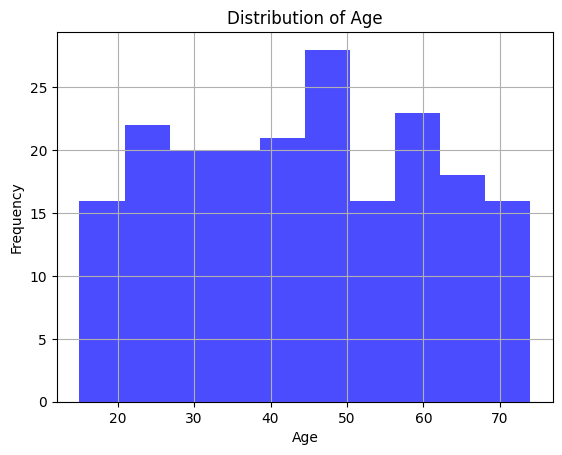

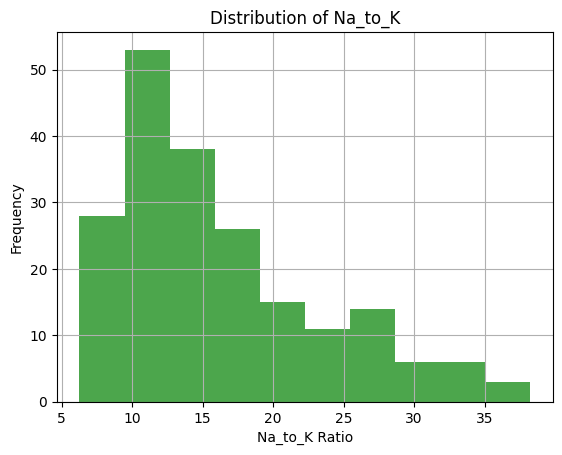

In [15]:
import matplotlib.pyplot as plt

# Plot histograms for numerical features
data['Age'].hist(bins=10, color='blue', alpha=0.7)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

data['Na_to_K'].hist(bins=10, color='green', alpha=0.7)
plt.title("Distribution of Na_to_K")
plt.xlabel("Na_to_K Ratio")
plt.ylabel("Frequency")
plt.show()


According to these histograms, the mean of age is around 44-45 years : in our dataset, middle age is the mostt rpresented.

Distribution of Na_to_K Ratio:

The second histogram illustrates the distribution of the sodium-to-potassium ratio (Na_to_K) in the dataset. 

Skewed Distribution: The Na_to_K ratio is right-skewed, with most patients having a ratio between 10 and 20.
High Concentration: A majority of patients have a Na_to_K ratio in the range of 10–15.
Outliers: There are a few observations with significantly higher Na_to_K ratios, reaching up to approximately 35.

knowing that :

Below 10: These may represent individuals with a higher potassium concentration compared to sodium, possibly due to a potassium-rich diet or sodium loss.
10–20: Likely reflects a "normal" range seen in typical medical contexts.
Above 20: Suggests individuals with a higher sodium concentration, which could correlate with conditions like hypertension.



Step 3: Visualize Relationships Between Features


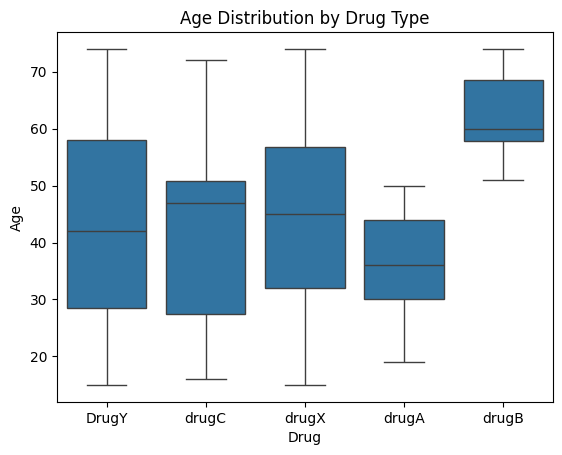

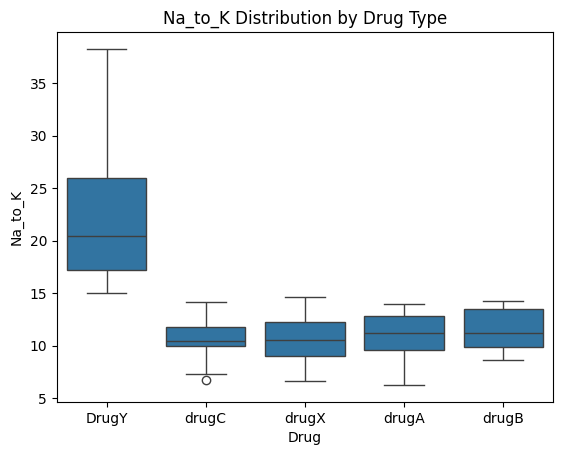

In [16]:
# We visualize relationships Between Features

import seaborn as sns
#Visualization of the age Distribution by Drug Type
sns.boxplot(x='Drug', y='Age', data=data)
plt.title("Age Distribution by Drug Type")
plt.show()
#Visualization of the Sodium by Drug Type

sns.boxplot(x='Drug', y='Na_to_K', data=data)
plt.title("Na_to_K Distribution by Drug Type")
plt.show()


 ### Distribution de Na_to_K par type de médicament

Ce diagramme illustre la distribution du ratio sodium/potassium (**Na_to_K**) pour chaque médicament.

#### Observations :
- **DrugY** :
  - Présente la plus grande variabilité avec une médiane élevée (~20).
  - Il est prescrit à des patients ayant des ratios très élevés, jusqu'à 35.
- **drugC, drugX, drugA et drugB** :
  - Ces médicaments présentent des plages de Na_to_K plus homogènes.
  - Médianes similaires (~10 à 12), indiquant des prescriptions dans des cas spécifiques.

#### Analyse :
- DrugY est clairement destiné aux patients avec des ratios Na_to_K élevés.
- Les autres médicaments ciblent des ratios plus bas, de manière plus uniforme.

Ce graphique permet de visualiser l’importance du ratio Na_to_K dans la sélection du médicament.


 

### Distribution de l'âge par type de médicament

Ce graphique montre la répartition de l'âge des patients pour chaque type de médicament.

#### Observations :
- **DrugY** :
  - Large plage interquartile (30 à 55 ans).
  - Médiane autour de 45 ans, ciblant principalement des patients d'âge moyen.
- **drugC et drugX** :
  - Médianes similaires (~40-45 ans), avec une variabilité modérée.
  - Administrés à des patients d'âge moyen à légèrement avancé.
- **drugA** :
  - Médiane basse (~30 ans), plage serrée (25-35 ans).
  - Prescrit principalement aux jeunes patients.
- **drugB** :
  - Médiane élevée (~60 ans), plage serrée (55-65 ans).
  - Ciblé pour les patients plus âgés.

#### Analyse :
- DrugY est un médicament généraliste, prescrit à une population variée.
- drugA et drugB sont spécialisés pour des tranches d'âge spécifiques :
  - **drugA** pour les jeunes.
  - **drugB** pour les seniors.

Ce graphique souligne l'importance de l'âge dans le choix du médicament, reflétant des prescriptions adaptées à différentes tranches d'âge.


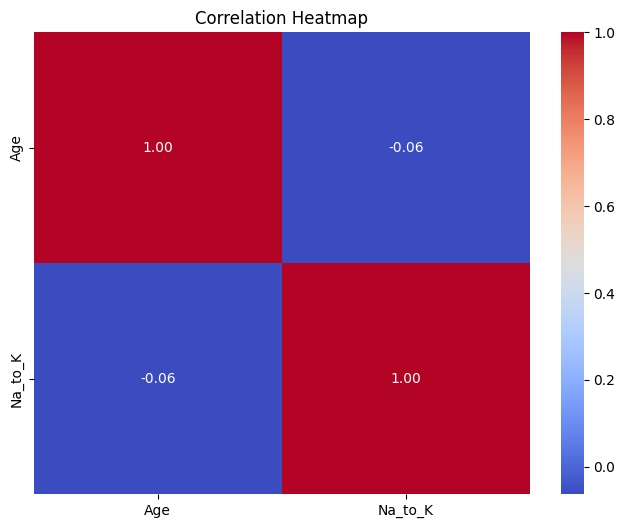

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for numerical features
correlation_matrix = data[['Age', 'Na_to_K']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


## Correlation Heatmap Analysis

### Objective:
The correlation heatmap visualizes the relationship between numerical features in the dataset: `Age` and `Na_to_K`.

### Observations:
1. **Self-Correlation**:
   - As expected, both `Age` and `Na_to_K` show perfect self-correlation (`1.00`) on the diagonal.

2. **Correlation between `Age` and `Na_to_K`**:
   - The correlation coefficient is approximately `-0.06`, indicating a **very weak negative correlation**.
   - This suggests that there is no significant linear relationship between a patient's age and their sodium-to-potassium ratio.

### Interpretation:
- Since the correlation between `Age` and `Na_to_K` is close to zero, these features are likely **independent** of each other.
- This independence implies that both features could contribute unique information to the model, depending on the target variable (`Drug`).

### Implications for the Model:
- Neither feature is redundant, so both `Age` and `Na_to_K` can be retained for model training.
- However, the weak correlation suggests that we may need to explore other advanced methods (e.g., feature importance) to understand their impact on the target variable.


